<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/ARIMA/PACF_and_ACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PACF (PARTIAL AUTO CORRELATION FUNCTION)**

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.

We're going to do is import plot and a plot akef from stat's models, these are more useful than just generic ACF functions that only give you back an array, since these will make a plot

and draw the confidence bounce automatically.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

Function for checking Stasionary or not

In [ ]:
def adf(x):
  res = adfuller(x)
  print("Test Statistic:", res[0])
  print('P-Value:', res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non Stationary")

In [ ]:
x0 = np.random.randn(1000)

In [ ]:
x0, len(x0)

(array([ 5.31449848e-01,  1.01003641e+00,  3.91383125e-01, -2.97687561e+00,
        -8.46226701e-01,  6.60537821e-01, -2.97557113e-01, -2.23810708e-01,
         1.28430741e+00,  1.29587396e+00, -9.71088169e-01,  4.88317158e-01,
         4.19915820e-01, -7.79074831e-02, -7.35496011e-01,  1.60029067e-01,
         4.28079835e-01,  5.12063789e-01, -9.52296994e-01,  1.67179119e-01,
         1.13249430e+00,  1.70712673e-01, -1.85212825e-02, -3.03325584e-01,
         7.62483041e-01,  1.05113712e+00, -1.68228380e-02,  1.05398229e+00,
        -1.61759694e+00, -4.96592148e-01,  4.77427475e-01, -6.78158874e-02,
        -4.80265662e-01, -4.14053023e-01,  1.11453793e+00, -1.34604978e+00,
         7.51474096e-02, -6.01046200e-01, -1.54604461e+00, -2.39448852e-01,
        -8.41644123e-01, -1.80157135e+00,  2.28336567e+00, -8.50940727e-01,
         8.35130152e-01, -1.00665787e+00,  4.33412639e-02,  1.12249773e+00,
         1.02570054e+00,  6.30840341e-01,  4.31380303e-01, -5.79793429e-01,
         7.9

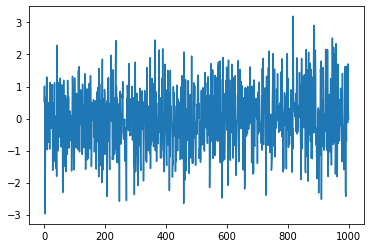

In [ ]:
plt.plot(x0)

Let's call the function of plot, we'll be looking at auto regressive models first.

And as you know, the relevant plot for that is the PACF. Notice that I'm using the subplots function to manage the size of a plot.

This returns an access object, which I then pass into the plot PACD function.


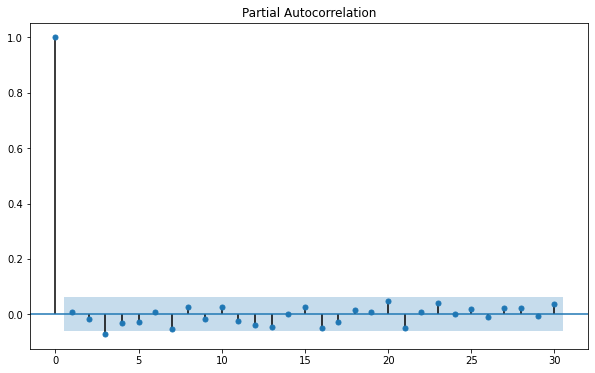

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(x0, ax=ax);

In [ ]:
adf(x0)

Test Statistic: -19.703755172312878
P-Value: 0.0
Stationary


Let's create an air one process and test that again to generate this process.

I'm going to create a list called X1 within initial value of zero.

Then I'm going to enter a loop that goes for 1000 iterations.

Inside this loop i'm going to create the next value by taking zero point five times the previous value, plus some Gaussian noise with standard deviation.

At zero point one, we'll call this variable X.

Next, we append X to X1. When we're outside the loop, we can't explain it to an umpire in the next block, we plot one.

In [ ]:
x1 = [0]
for i in range(1000):
  x = 0.5 * x1[-1] + 0.1 * np.random.randn()
  x1.append(x)
x1 = np.array(x1)

In [ ]:
x1

array([ 0.        , -0.16510594, -0.04807975, ..., -0.09759347,
       -0.25469132, -0.09363785])

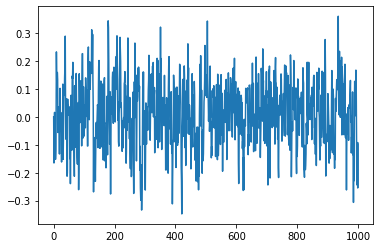

In [ ]:
plt.plot(x1);

As you can see, it looks pretty stationary and there's no real observable difference

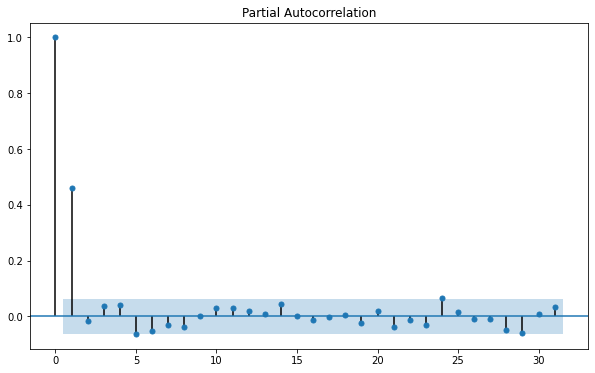

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(x1, ax=ax);

In [ ]:
x1 = [0]
for i in range(1000):
  x = -0.5 * x1[-1] + 0.1 * np.random.randn() # in this section, we use 0.5, instead previous section we use -0.5
  x1.append(x)
x1 = np.array(x1)

In [ ]:
x1

array([ 0.        , -0.06784542, -0.06817418, ...,  0.0304811 ,
       -0.00204916,  0.03472987])

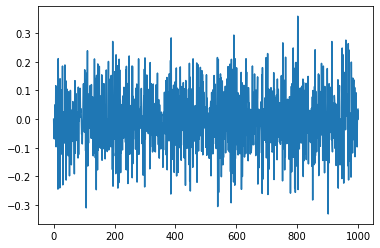

In [ ]:
plt.plot(x1)

In [ ]:
adf(x1)

Test Statistic: -58.50477376238723
P-Value: 0.0
Stationary


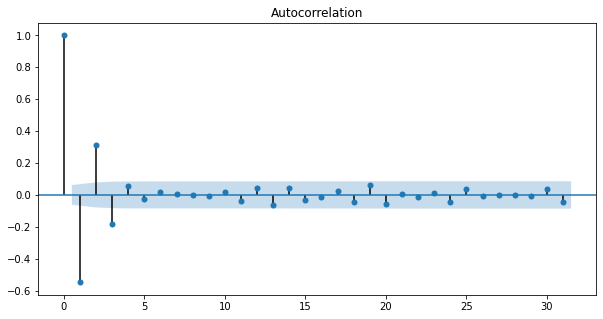

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(x1, ax=ax);

In [ ]:
x2 = [0, 0]
for i in range(1000):
  x = 0.5 * x2[-1] - 0.3 * x2[-2] + 0.1 * np.random.randn()
  x2.append(x)
x2 = np.array(x2)

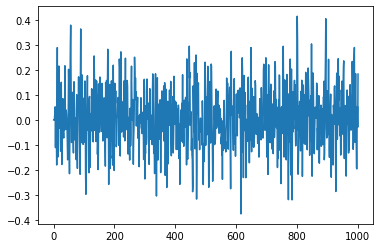

In [ ]:
plt.plot(x2);

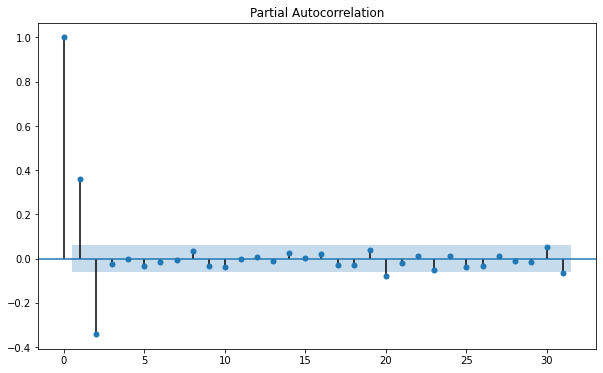

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(x2, ax=ax);

In [ ]:
adf(x2)

Test Statistic: -25.41371243963708
P-Value: 0.0
Stationary


In [ ]:
x5 = [0, 0, 0, 0, 0]
for i in range(1000):
  x = 0.5 * x5[-1] - 0.3 * x5[-2] - 0.6 * x5[-5] + 0.1 * np.random.randn()
  x5.append(x)
x5 = np.array(x5);

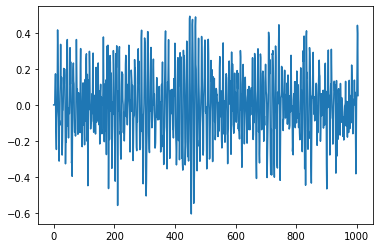

In [ ]:
plt.plot(x5);

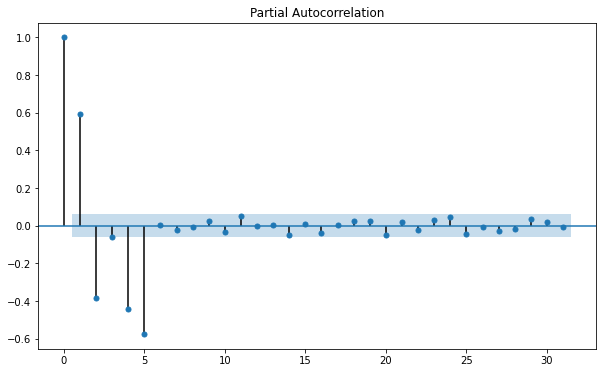

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(x5, ax=ax);

In [ ]:
adf(x5)

Test Statistic: -38.666585103454466
P-Value: 0.0
Stationary


# **ACF (AUTO CORRELATION FUNCTION)**

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’

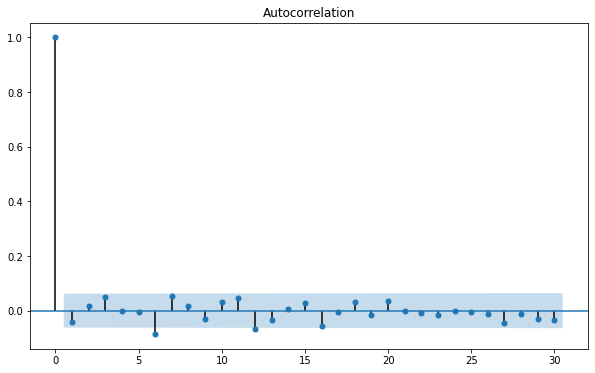

In [ ]:
#iid noise
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(np.random.randn(1000), ax=ax);

In [ ]:
# creating an array of size 1000 with
# samples from the normal with mean zero 
# and standard deviation at zero point one.
errors = 0.1 * np.random.randn(1000)
# ma1 for generated by adding the current error, plus 
# some coefficient times the previous errors.
ma1 = []
for i in range(1000):
  if i >= 1:
    x = 0.5 * errors[i-1] + errors[i]
  else:
    x = errors[i]
  ma1.append(x)
ma1 = np.array(ma1)

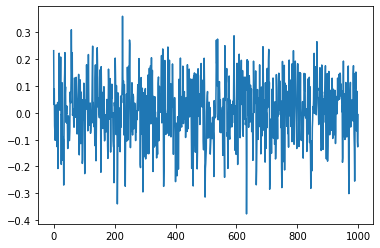

In [ ]:
plt.plot(ma1);

In [ ]:
# lets check ma1 is stasioner or not
adf(ma1)

Test Statistic: -16.201160124385453
P-Value: 4.0759675299787076e-29
Stationary


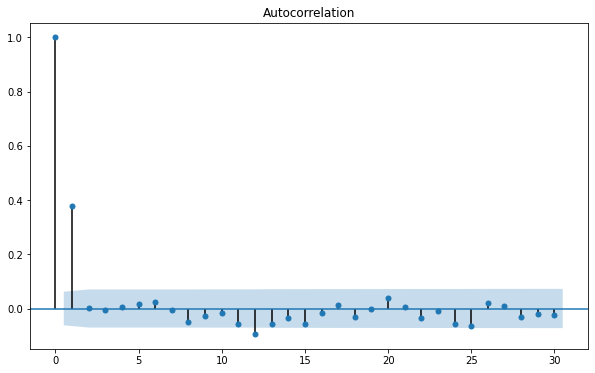

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(ma1, ax=ax);

In [ ]:
errors = 0.1 * np.random.randn(1000)
ma2 = []
for i in range(1000):
  x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + errors[i]
  ma2.append(x)
ma2 = np.array(ma2)

In [ ]:
adf(ma2)

Test Statistic: -13.150407076730591
P-Value: 1.3706849939024758e-24
Stationary


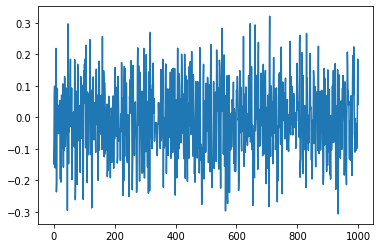

In [ ]:
plt.plot(ma2);

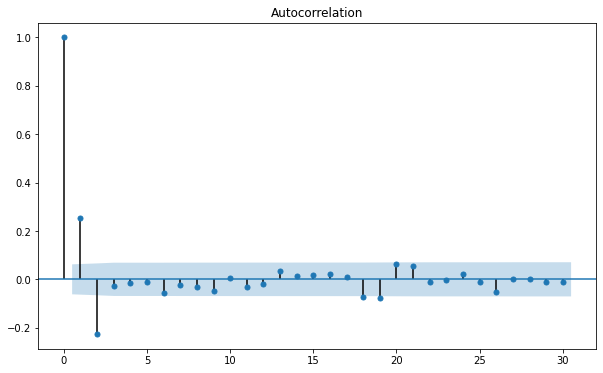

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(ma2, ax=ax);

In [ ]:
errors - 0.1 * np.random.randn(1000)
ma3 = []
for i in range(1000):
  x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + errors[i]
  ma3.append(x)
ma3 = np.array(ma3)

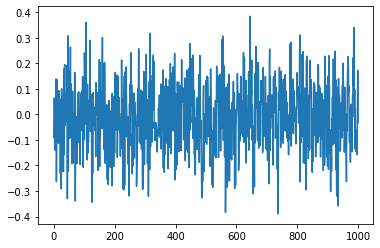

In [ ]:
plt.plot(ma3);

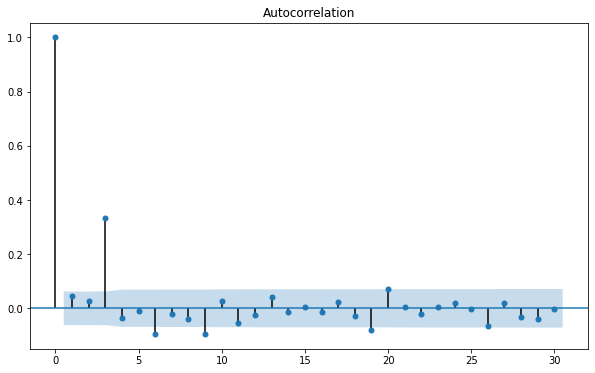

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(ma3, ax=ax);

In [ ]:
adf(ma3)

Test Statistic: -13.94261815159941
P-Value: 4.8608422631433174e-26
Stationary


In [ ]:
errors = 0.1 * np.random.randn(1000)
ma6 = []
for i in range(1000):
  x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + \
      0.2 * errors[i-4] - 0.8 * errors[i-5] + 0.7 * errors[i-6] + errors[i]
  ma6.append(x)
ma6 = np.array(ma6)

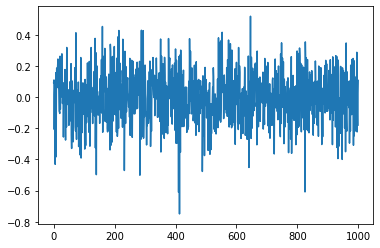

In [ ]:
plt.plot(ma6);

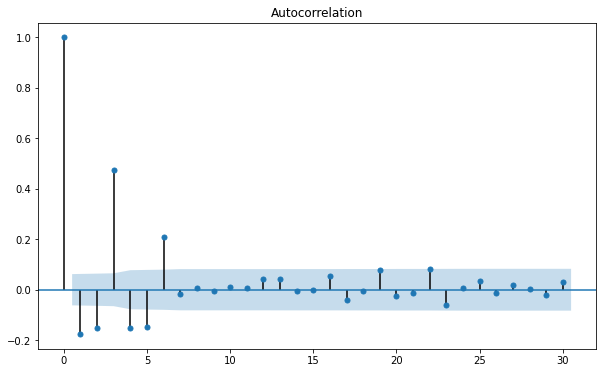

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(ma6, ax=ax);

In [ ]:
adf(ma6)

Test Statistic: -6.339327871880602
P-Value: 2.779743295877229e-08
Stationary
